In [1]:
#check https://koljakleineberg.wordpress.com/materials/ for updates


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols,Matrix,solve,diff,init_printing
from scipy.integrate import odeint
init_printing()

#Always use a large enough font size!
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Predator prey model:

x: Prey (Rabbits) <br>
y: Predator (Foxes)

$F(x,y) = (\underbrace{a x}_{\text{Rabbits reproduce}} - \underbrace{b x y}_{\text{Rabbits get eaten by fox}}, \underbrace{-c y}_{\text{Foxes die out without rabbits}}+\underbrace{d x y}_{\text{Foxes thrive by eating rabbits}})$

$a,b,c,d > 0$ are parameters of the model. In simple terms, $a$ describes the reproduction rate of rabbits in the absence of foxes, $b$ describes the reduction of rabbit population if a rabbit meets a fox, $c$ describes the decay rate of the fox population if there are not rabbits (starving foxes), and finally $d$ describes the increase of fox population if a fox meets a rabbit.

In [2]:
#symbols is a function from the sympy package, defines symbolic variables
x,y,a,b,c,d = symbols('x y a b c d')

def F(x,y,a,b,c,d):
    return [a*x - b*x*y, -c *y+d*x*y]

### Get fixpoints
Solve $F(x,y)=(0,0)$

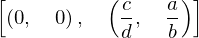

In [3]:
#solve is a function from the sympy package
fps=solve(F(x,y,a,b,c,d),[x,y]) #solves a*x - b*x*y == 0 && -c *y+d*x*y == 0, solving for x and y
fps

In [4]:
def fix(i,a1,b1,c1,d1):
    vl=list(zip([a,b,c,d],[a1,b1,c1,d1]))
    return [z.subs(vl) for z in fps[i]]

### Jacobian Matrix

In [5]:
i,j = symbols('i j')

In [6]:
#Define a vector with all state variables, easier to generalize to more dimensions
v=[x,y]
def jij(i,j):
    #diff is a function from the sympy package
    return diff(F(x,y,a,b,c,d)[i],v[j])

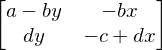

In [7]:
#Marix function from sympy:
J = Matrix(len(v),len(v),jij)
#J now is the Jacobian matrix in symbolic form
J

In [8]:
# #Explicit way
# J = Matrix(np.empty([len(v),len(v)]))
# for i in range(0,len(v)):
#     for j in range(0,len(v)):
#         J[i,j]=diff(F(x,y,a,b,c,d)[i],v[j])

# #J now is the Jacobian matrix in symbolic form
# J

### Stability of first fixpoint
Calculate Eigenvalues of J at first fixpoint

In [9]:
f1l=J.subs(list(zip([x,y],fps[0]))).eigenvals()
#.subs replaces x and y with the values in fps[0], hence x=0,y=0. 
#.eigenvals returns diccionary with eigenvalues and their multiplicity.
#following line extracts only Eigenvalues
[evs for evs,multiplicity in f1l.items()]

One Eigenvalue is positive, hence fixpoint is unstable. 

### Stability of second fixpoint
Calcualte Eigenvalues of J at second fixpoint

In [10]:
f2l=J.subs(list(zip([x,y],fps[1]))).eigenvals()
[evs for evs,multiplicity in f2l.items()]

Since a,b,c,d > 0, both Eigenvalues are purely imaginary. We cannot say anything about the stability of the fixpoint from this (more advanced techniques would have to be applied), but the imaginary Eigenvalues suggest oscillating behavior.

### Streamplot and numerical integration

Indeed we find an oscillating behavior by looking at the streamplot as well as the numerical solution of the differential equation.

In [11]:
r=5
x1 = np.linspace(0,r,101)
X,Y = np.meshgrid(x1,x1)

#initial condition for integration
x0 = [1.5,0.8]

#define function in vector like input form. 
def F2(vx,t,a,b,c,d):
    x,y=vx
    return F(x,y,a,b,c,d)

t = np.linspace(0, 20, 101)
    
def plotF(a,b,c,d):
    #Evaluate streamplot data
    U, V = F(X,Y,a,b,c,d)
    #Numberical integration
    sol = odeint(F2, x0, t, args=(a,b,c,d))
    
    f, ax = plt.subplots(1,2,figsize=(12,6))
    
    ax[0].streamplot(X, Y, U, V,density=1.5,linewidth=0.5,color='black')
    #hightlight stream lines originating from initial conditions:
    ax[0].streamplot(X, Y, U, V,density=1.5,linewidth=1.5,color='g',start_points=[x0])
    ax[0].plot(x0[0], x0[1], 'bo',color='g')
    #plot fixpoint in black:
    myfp=fix(1,a,b,c,d)
    ax[0].plot(myfp[0], myfp[1], 'bo',color='black')
    ax[0].axis((0, r, -0, r))
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    
    
    ax[1].plot(t, sol[:, 0],  label='x(t)')
    ax[1].plot(t, sol[:, 1],  label='y(t)')
    ax[1].legend(loc=1,fontsize=14)
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('Population')
    
    plt.tight_layout()
    plt.show()
    
interactive_plot = interactive(plotF,  a=(0,2,0.1), b=(0,2, 0.1),c=(0,2,0.1),d=(0,2,0.1))    

interactive_plot

interactive(children=(FloatSlider(value=1.0, description='a', max=2.0), FloatSlider(value=1.0, description='b'…